# Tutorial 10
# Implementation from scratch for Ad CTR Optimization
MABP has many uses in the internet advertising area, as indicated in the use cases section.

Assume an advertising company is running ten separate adverts on a webpage, each aimed at a comparable demographic. Here are the results for which adverts a person clicked. Each column index corresponds to a distinct advertisement. If a user clicked on the ad, we get a 1; otherwise, we get a 0. The following is an example from the original dataset:

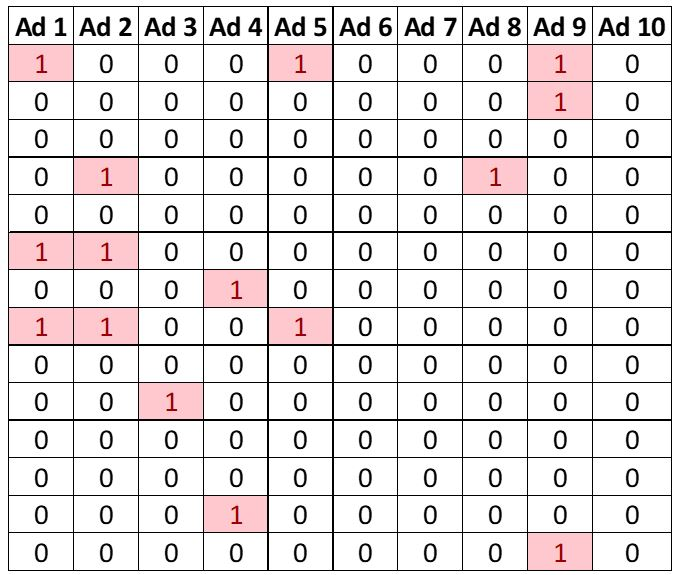

In [1]:
from IPython.display import Image
Image(filename = r'Im1.png', width = 400, height = 600)

This is a simulated dataset and it has Ad #5 as the one which gives the maximum reward.

We will start with a random selection strategy, in which we pick any ad at random and present it to the user. We are compensated if the user clicks on the ad; otherwise, there is no profit.

In [3]:
# Random Selection

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ads_Optimisation.csv')

# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d) # Random means that the total reward number will be different
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    print(n, "\t", ad, "\t", reward, "\t")
    total_reward = total_reward + reward

# Total reward
print(total_reward)

0 	 6 	 0 	
1 	 9 	 0 	
2 	 0 	 0 	
3 	 6 	 0 	
4 	 4 	 0 	
5 	 4 	 0 	
6 	 2 	 0 	
7 	 7 	 0 	
8 	 4 	 0 	
9 	 8 	 0 	
10 	 2 	 0 	
11 	 2 	 0 	
12 	 2 	 0 	
13 	 9 	 0 	
14 	 4 	 0 	
15 	 2 	 0 	
16 	 1 	 0 	
17 	 4 	 0 	
18 	 0 	 0 	
19 	 0 	 0 	
20 	 3 	 0 	
21 	 9 	 1 	
22 	 8 	 0 	
23 	 3 	 0 	
24 	 4 	 1 	
25 	 5 	 0 	
26 	 0 	 0 	
27 	 1 	 1 	
28 	 7 	 0 	
29 	 3 	 0 	
30 	 7 	 0 	
31 	 8 	 0 	
32 	 0 	 0 	
33 	 3 	 1 	
34 	 5 	 1 	
35 	 1 	 0 	
36 	 3 	 0 	
37 	 3 	 0 	
38 	 7 	 0 	
39 	 7 	 1 	
40 	 8 	 0 	
41 	 0 	 0 	
42 	 8 	 0 	
43 	 7 	 0 	
44 	 4 	 0 	
45 	 6 	 0 	
46 	 3 	 0 	
47 	 4 	 0 	
48 	 5 	 0 	
49 	 1 	 0 	
50 	 7 	 1 	
51 	 8 	 0 	
52 	 8 	 0 	
53 	 7 	 0 	
54 	 1 	 0 	
55 	 7 	 0 	
56 	 5 	 0 	
57 	 1 	 0 	
58 	 0 	 0 	
59 	 9 	 0 	
60 	 3 	 0 	
61 	 9 	 0 	
62 	 7 	 0 	
63 	 0 	 0 	
64 	 5 	 0 	
65 	 1 	 0 	
66 	 3 	 0 	
67 	 5 	 0 	
68 	 9 	 0 	
69 	 3 	 0 	
70 	 4 	 0 	
71 	 8 	 0 	
72 	 7 	 0 	
73 	 5 	 0 	
74 	 1 	 0 	
75 	 3 	 0 	
76 	 0 	 0 	
77 	 7 	 

The total reward for using the random selection approach is 1170. Because this algorithm does not learn anything, it will not intelligently choose the most profitable ad. As a result, even looking at the previous 1000 trials will not yield the best ad.

In [4]:
pd.Series(ads_selected).tail(1000).value_counts(normalize = True)

7    0.119
8    0.111
3    0.109
1    0.106
6    0.105
0    0.101
9    0.091
5    0.088
2    0.085
4    0.085
dtype: float64

In [10]:
# Implementing UCB
import math
N = 10000 # Number of users
d = 10 # Number of advertisements
ads_selected          = []
numbers_of_selections = [0] * d
sums_of_reward        = [0] * d
total_reward          = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        print("i = ", i)
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    print(numbers_of_selections[ad] , "\t", reward)
    total_reward += reward

# Total reward
print(total_reward)

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 1
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
2 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
2 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
2 	 0
i =  0
i =  

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1467 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1468 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
222 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1469 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
152 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1470 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
197 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
243 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
499 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
421 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
1471 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
283 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =

i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3811 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3812 	 1
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3813 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3814 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3815 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3816 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3817 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3818 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
929 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3819 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
200 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
395 	 0
i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
3820 	 0
i = 

The total_reward for UCB comes out to be 2125. Clearly, this is much better than random selection and indeed a smart exploration technique that can significantly improve our strategy to solve a MABP.

In [11]:
pd.Series(ads_selected).value_counts(normalize = True)

4    0.5630
7    0.1106
0    0.0947
6    0.0435
1    0.0417
3    0.0380
8    0.0352
2    0.0338
9    0.0215
5    0.0180
dtype: float64

After just 1500 trials, UCB is already favouring <b>Ad #5 (index 4) </b> which happens to be the optimal ad, and gets the maximum return for the given problem.

Being an active area of research MABP will percolate to various other fields in the industry. These algorithms are so simple and powerful that they are being used increasingly by even small tech companies, as the computation resources required for them are often low.

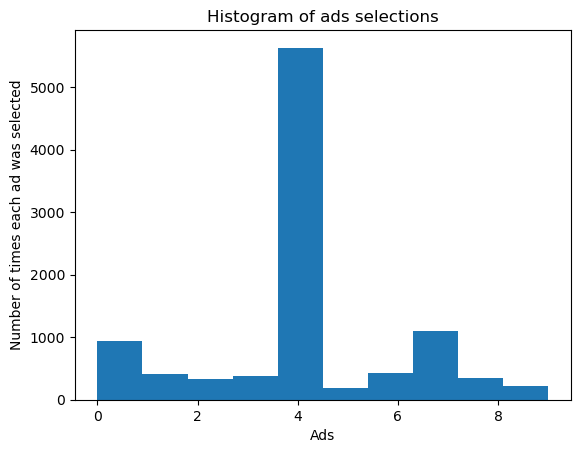

In [12]:
#We visualise the model to identify the add

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [14]:
# Random Selection

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('MovieReviews.csv')

# Implementing Random Selection
import random
N = 100
d = 5
movies_reviewed = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    movies_reviewed.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

# Total reward
print(total_reward)

36


In [15]:
# Implementing UCB
import math
N = 100
d = 5
movies_reviewed = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    movies_reviewed.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward
    
# Total reward
print(total_reward)

35


In [16]:
pd.Series(movies_reviewed).tail(100).value_counts(normalize = True)

4    0.30
2    0.23
1    0.22
0    0.14
3    0.11
dtype: float64

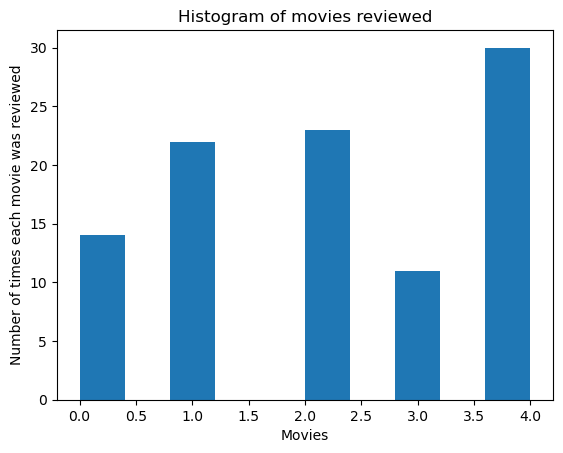

In [18]:
# We visualise the model to identify the add

plt.hist(movies_reviewed)
plt.title('Histogram of movies reviewed')
plt.xlabel('Movies')
plt.ylabel('Number of times each movie was reviewed')
plt.show()

# Thompson Sampling Algorithm

In [19]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

dataset = pd.read_csv('Ads_CTR.csv')
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


(   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
 0     1     0     0     0     1     0     0     0     1      0
 1     0     0     0     0     0     0     0     0     1      0
 2     0     0     0     0     0     0     0     0     0      0
 3     0     1     0     0     0     0     0     1     0      0
 4     0     0     0     0     0     0     0     0     0      0,
 None)

In [21]:
# Implementing the algorithm

# We import random library because we are working with distributions

import random

N = 10000 #number of users who see the ads
d = 10 #number of ads

# We implement here Step 1

ads_selected = [] #list of all the ads that will be selected over the rounds
numbers_of_rewards_1 = [0] * d #we start at 0 because there is no reward at all at the beginning (from 'step 1 in powerpoint slide 30')
numbers_of_rewards_0 = [0] * d #we start at 0 because there is no reward at all at the beginning
total_reward = 0 #total reward accumulated during the time that we are working. It starts from 0 because nothing happen
                #at the momento zero, when we begin the process
    
# We start the for loop that will check when the user decided to click the add. 

# We implement here Step 2

for n in range(0, N): #n = rounds , index starts in 0 and we go up to N
    ad = 0 #there will be a second loop that will iterate from 0 till the last ad
    max_random = 0 #it starts from zero. This is the maximum of the random draws
        
# We start the second for loop

    for i in range(0, d): #here we go from 0 till the nimber of ads
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) 
        # We implement here step 3
        # we need to compare the random draw with max random draw
        if random_beta > max_random: #if the max random is higher than the random beta, then it will be updated by the algorithm
            max_random = random_beta 
            ad = i 
    # We finish the implementation updating the variables
    ads_selected.append(ad) #the ad selected list will create a lost of all the rewards
    reward = dataset.values[n, ad] 
    # we indicate if we had a reward 1 or 0
    if reward == 1: 
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1 #the reward is 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1 #the reward is 0
        
    total_reward = total_reward + reward #0 where we started + the accumulated rewards

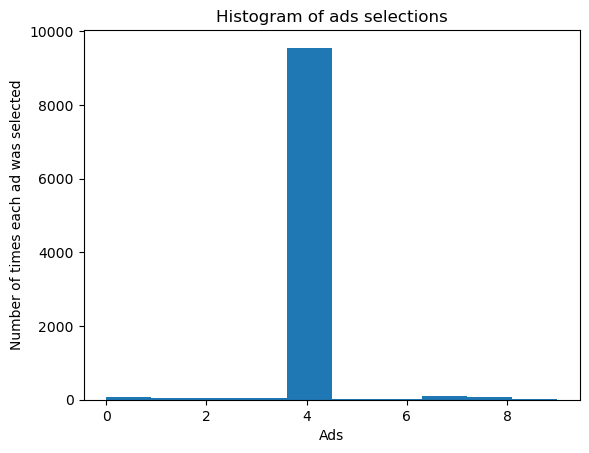

In [22]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Reference:
* <p>https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/</p>
* <p>https://analyticsindiamag.com/thompson-sampling-explained-with-python-code/</p>